
# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
    In this project I will be analyzing data associated with no show appointments. 


### Dataset Description 
    This is a dataset containing information of 100k medical appointments in Brasil. It is focused on patients showing up for the appointment. The dataset contains the columns PatientID, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, and No-show.

### Question(s) for Analysis

Which factors are important to consider for predicting if a patient will show up or not?


In [1]:
#Here I imported pandas, matplotlib.pyplot, numpy, and set matplotlib to inline 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
#Here I read in the data from the dataset and show the header just to get an idea of what i'm working with

df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<h3>Data Cleaning</h3>

Now I'm just examing the dataset to see what needs cleaned up.

In [3]:
#Checking the shape to see how many rows and columns
df.shape

(110527, 14)

In [4]:
#checking describe to see what might need to be cleaned up.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
#I can see age has a -1 so lets remove those

df = df[df['Age'] >0]
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264
std,2.558267e+14,7.133274e+04,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172463e+13,5.680744e+06,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.433600e+13,5.725634e+06,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
#I dropped the categories patiendid and appointmentid as I don't see they will be useful. 
#I also dropped scholarship because I coudn't find an answer as to what it meant.
df=df.drop(['PatientId','AppointmentID','Scholarship'], axis=1)
df.head()


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,1,1,0,0,0,No


In [7]:
#Here I changed SMS-recieved and No-show just to make it easier to work with
df=df.rename(columns={'SMS_received':'sms','No-show':'noshow'})
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Hipertension,Diabetes,Alcoholism,Handcap,sms,noshow
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,1,1,0,0,0,No


<h3>Exploratory Data Analysis</h3>

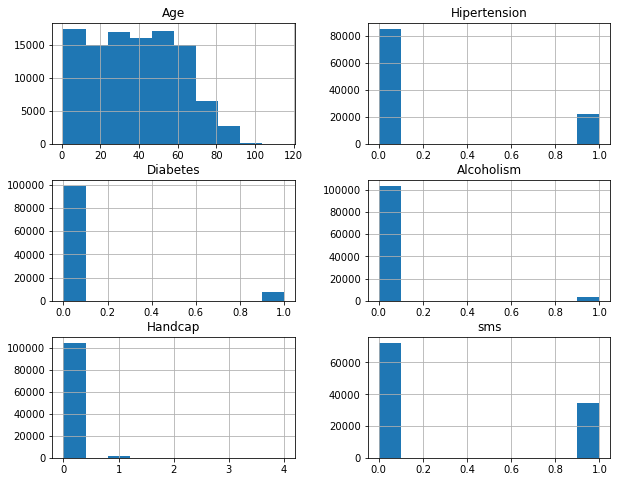

In [8]:
#Here i run .hist to show a few histograms just to explore.
df.hist(figsize=(10,8));

In [9]:
#showing the number of patients who did not recieve vs did recieve sms
df['sms'].value_counts()

0    72402
1    34585
Name: sms, dtype: int64

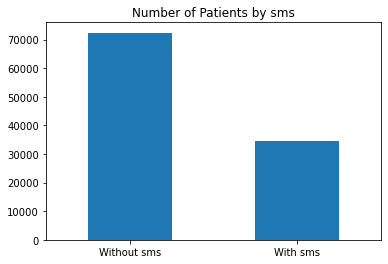

In [10]:
#showing the number of patients who did not recieve vs did recieve sms in a bar chart
df['sms'].value_counts().plot(kind='bar')
#add xticks and rotate because it showed up horizontal for some reason?
plt.xticks([0,1],['Without sms','With sms'],rotation=360)
#add title
plt.title('Number of Patients by sms');

In [11]:
#showing number of patients with and without hipertension
df.groupby('noshow')['Hipertension'].value_counts()

noshow  Hipertension
No      0               67278
        1               18029
Yes     0               17908
        1                3772
Name: Hipertension, dtype: int64

Text(0, 0.5, 'Number of Patients')

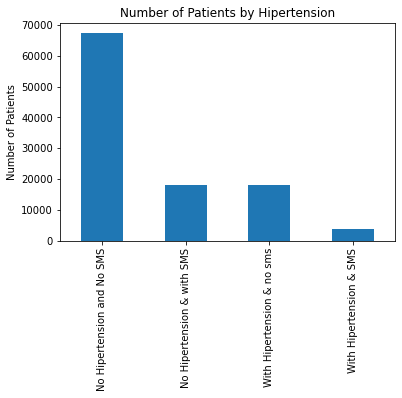

In [12]:
#showing the number of patients by Hipertension and Sms in a bar chart
df.groupby('noshow')['Hipertension'].value_counts().plot(kind='bar')
#add xticks and rotate because it showed up horizontal for some reason?
plt.xticks([0,1,2,3],['No Hipertension and No SMS','No Hipertension & with SMS','With Hipertension & no sms','With Hipertension & SMS'])
#add title
plt.title('Number of Patients by Hipertension')
#add xlabel
plt.xlabel('')
plt.ylabel('Number of Patients')

In [13]:
#showing the number of patients by Age... too many to show
df['Age'].value_counts()

1      2273
52     1746
49     1652
53     1651
56     1635
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 102, dtype: int64

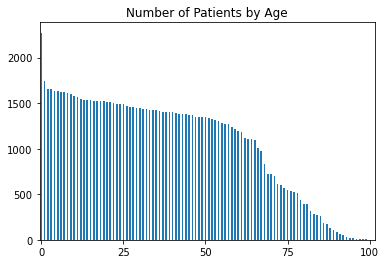

In [14]:
#showing the number of patients by Age in bar chart
df['Age'].value_counts().plot(kind='bar')
#add xticks and rotate because it showed up horizontal for some reason?
plt.xticks([0,25,50,75,100],['0','25','50','75','100'],rotation=360)
#add title
plt.title('Number of Patients by Age');

In [17]:
#create masks for show and no-show
showed = df.noshow == "No"
noshow = df.noshow == "Yes"
genderf=df.Gender =="F"
genderm=df.Gender =="M"

In [18]:
#show value counts of sms messages just to see how many did not recieve and did recieve sms
df['sms'].value_counts()

0    72402
1    34585
Name: sms, dtype: int64

Here i'm going to define a function to use later.

In [16]:
def histPlotNoshow(df,myVar,bins=2,xticks=None):
    #This function is used to create a histogram comparing a variable against whether they showed for the appointment or not
    #Set the no show 
    df[myVar][noshow].hist(alpha = 1, bins=bins,label='No Show', color='blue')
    #set showed
    df[myVar][showed].hist(alpha = .5, bins=bins,label='Showed', color='red')
    #add a title
    plt.xlabel(myVar.title())
    #add Y axis label
    plt.ylabel('Number of patients')
    #add title
    plt.title(f'Number of patients by {myVar} that showed vs noshowed')  
    #add legend
    plt.legend();

<h4>Research Question 1:</h4> 
Does having an sms message sent have an impact on whether the patient showed up or not?

#No show by SMS message

In [19]:
#group by no show and sms to get value counts
df.groupby('noshow')['sms'].value_counts()

noshow  sms
No      0      60290
        1      25017
Yes     0      12112
        1       9568
Name: sms, dtype: int64

Text(0, 0.5, 'Number of Patients')

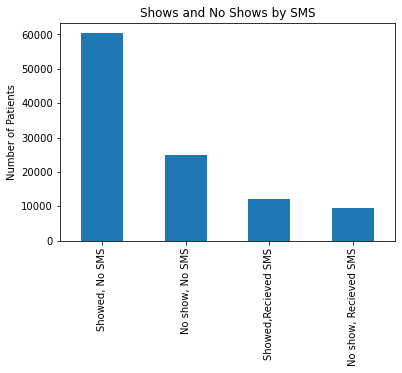

In [20]:
#create chart
df.groupby('noshow')['sms'].value_counts().plot(kind='bar')
#add xticks
plt.xticks([0,1,2,3],['Showed, No SMS','No show, No SMS','Showed,Recieved SMS','No show, Recieved SMS'])
#add title
plt.title('Shows and No Shows by SMS');
#addlabels
plt.xlabel('')
plt.ylabel('Number of Patients')

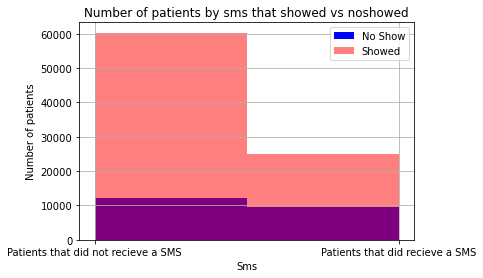

In [21]:
#Originally tried to do it with hist, but the bar seems to show it much better. left this just to show use of my function
#call histPlotNoshow function
histPlotNoshow(df,'sms')
#add xticks
plt.xticks([0,1],['Patients that did not recieve a SMS','Patients that did recieve a SMS']);

Question 1 conclusion: It seems that the patients that recieved an sms were more likely to show up for their appointment.

<h4>Research Question 2: </h4>
Does the patients age influence whether they showed up or not? #No show by Age

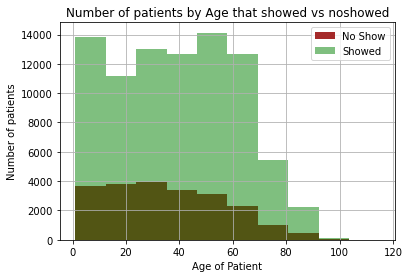

In [22]:
#Here I create a histogram to show age by noshow and showed
df.Age[noshow].hist(alpha = 1,label='No Show', color='brown')
df.Age[showed].hist(alpha = 0.5,label='Showed', color='green')
#add labels
plt.xlabel('Age of Patient')
plt.ylabel('Number of patients')
#add title
plt.title('Number of patients by Age that showed vs noshowed')
#add legend
plt.legend()

Question 2 conclusion:
It seems that Age does influence whether they will show up or not. It looks like small children are very likely to show up with a dip as they get to their late teens and early twenties. In the mid 20s all the way to the 70's people seem to show up with older adults being less reliable.

I also included Does hipertension influence whether the patient showed up or not?

In [24]:
#value counts for Hipertension
df['Hipertension'].value_counts()

0    85186
1    21801
Name: Hipertension, dtype: int64

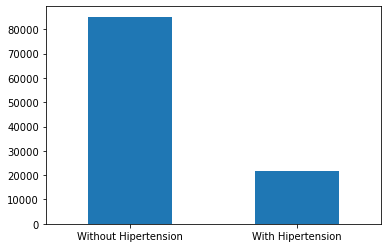

In [25]:
#just a simple bar chart showing Hipertension values
df['Hipertension'].value_counts().plot(kind='bar')
plt.xticks([0,1],['Without Hipertension','With Hipertension'],rotation=360);

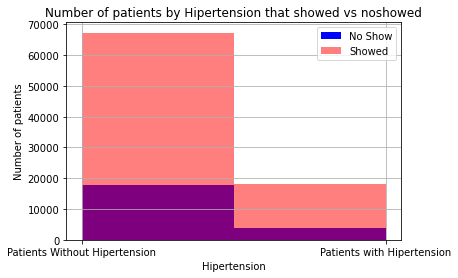

In [27]:
#call histPlotNoshow function
histPlotNoshow(df,'Hipertension')
#add xticks
plt.xticks([0,1],['Patients Without Hipertension','Patients with Hipertension']);

This shows that hipertension does seem to have an effect, but it does seem marginal. It may just be due to the data we have.

<h4>Conclusions: </h4>
I found that age age, and sms message, and suprisingly hipertension(although marginal) all had an effect on whether the patient showed up or not.

<h4>Limitations: </h4>
At first I was trying to see if neighborhoods and handicap would influence the show and no shows. But I found that too many neighborhoods limited being able to figure that question out.